In [37]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler 


In [38]:
df = pd.read_csv('auta.csv', index_col= 0)

In [39]:
print(df.shape)
print(df.head())
z = StandardScaler()
auta = df.copy()
auta[auta.columns] = z.fit_transform(df[df.columns])
auta_cols = auta.columns

(53, 5)
             Cena  Przebieg  Pojemnosc   KM  diesle
Audi A3   20900.0  164450.0     1896.0  110    66.9
Audi A4   25311.4  182000.0     1900.0  130    75.7
Audi A6   31500.0  185000.0     2496.0  170    82.5
Audi A8  109000.0  129380.0     4134.0  300    68.1
Audi Q7  179000.0   72000.0     3000.0  240    89.1


In [40]:
auta.head()

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,-0.198580,0.484563,-0.017676,-0.248784,0.040064
Audi A4,-0.055174,0.944320,-0.009643,0.202004,0.458097
Audi A6,0.146007,1.022911,1.187258,1.103579,0.781122
Audi A8,2.665391,-0.434164,4.476727,4.033697,0.097069
Audi Q7,4.940965,-1.937346,2.199402,2.681335,1.094646


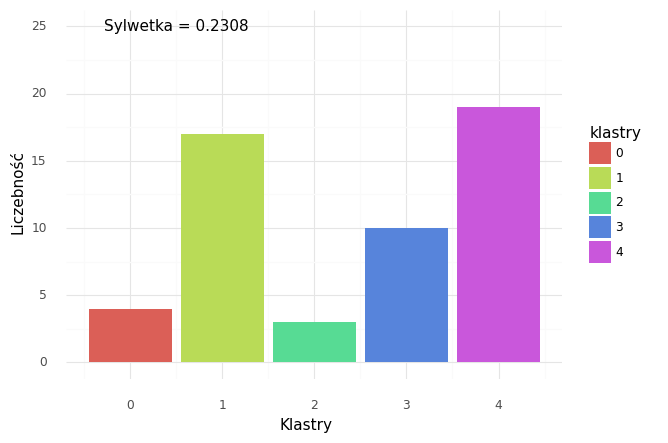

<ggplot: (176506920138)>

In [41]:
gm = GaussianMixture(n_components=5).fit(auta[auta_cols])

auta['klastry_gm'] = gm.predict(auta[auta_cols])
sylwetka_gm = round(silhouette_score(auta[auta_cols], gm.predict(auta[auta_cols])),4)

(ggplot(auta, aes(x = 'klastry_gm', fill = 'factor(klastry_gm)')) +
 geom_bar()+
 annotate('text', x = 0.5, y = 25, label = f'Sylwetka = {sylwetka_gm}')+
 theme_minimal()+
 labs(x = 'Klastry', y = 'Liczebność',fill = 'klastry'))